In [1]:
import sys
sys.path.append('../')

In [2]:
import matplotlib.pyplot as plt
from neuro_models.neuro_ode_models import HH
import numpy as np

# Problem 1a

In [3]:
param1 = {
    "Cm": 1,
    "gL": 0.3,
    "EL": -54.387,
    "gK": 0, # K+ channel is off
    "EK": -77,
    "gNa": 120,
    "ENa": 50
}

In [4]:
hh1 = HH(param1)

In [5]:
V0=-65.0
n0=hh1.n_infty(V0)
m0=hh1.m_infty(V0)
h0=hh1.h_infty(V0)

In [6]:
dt = 0.001
t0 = 0
tn = 100
time=np.arange(t0,tn,dt)

In [7]:
# injected current is 0 for all 100 ms
hh1.Ix = np.append(np.zeros_like(time), 0)

In [8]:
t1, y1 = hh1.euler_method(V0, n0, m0, h0, t0, tn, dt)

In [9]:
V = y1[0]
n = y1[1]
m = y1[2]
h = y1[3]

In [10]:
import seaborn as sns

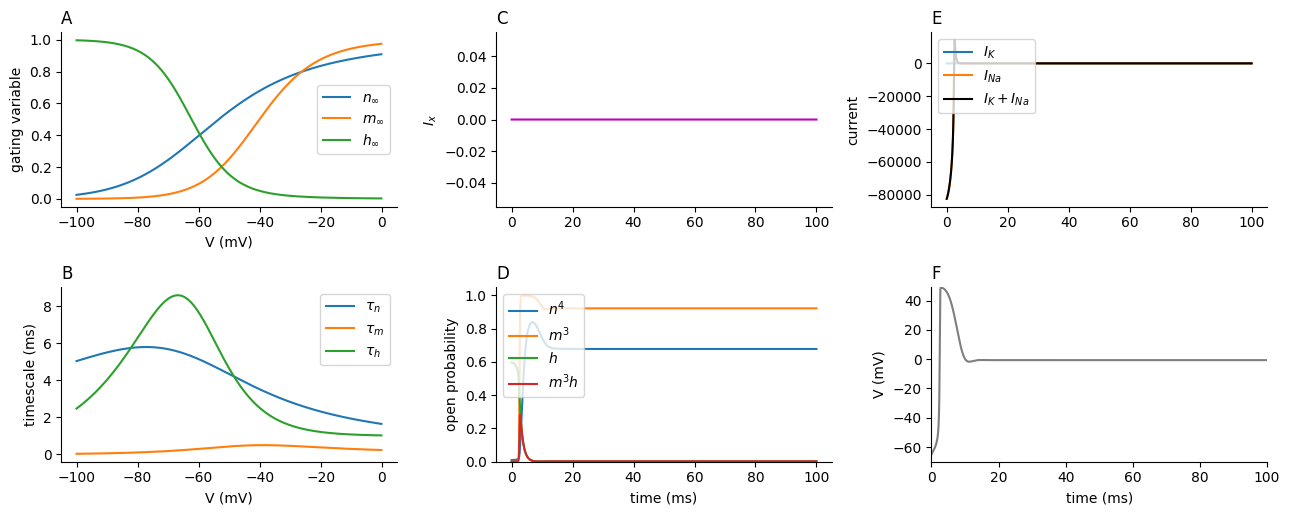

In [11]:
# Make figure
plt.subplots(2,3,figsize=(13,5.25))

# Membrane potential for plotting
Vplot=np.arange(-100,0,.1)

plt.subplot(2,3,1)
plt.plot(Vplot,hh1.n_infty(Vplot),label=r'$n_\infty$')
plt.plot(Vplot,hh1.m_infty(Vplot),label=r'$m_\infty$')
plt.plot(Vplot,hh1.h_infty(Vplot),label=r'$h_\infty$')
plt.legend()
plt.xlabel('V (mV)')
plt.ylabel('gating variable')
plt.title('A',loc='left')
sns.despine()


plt.subplot(2,3,4)
plt.plot(Vplot,hh1.tau_n(Vplot),label=r'$\tau_n$')
plt.plot(Vplot,hh1.tau_m(Vplot),label=r'$\tau_m$')
plt.plot(Vplot,hh1.tau_h(Vplot),label=r'$\tau_h$')
plt.legend()
plt.xlabel('V (mV)')
plt.ylabel('timescale (ms)')
plt.title('B',loc='left')
sns.despine()



plt.subplot(2,3,2)
plt.plot(t1,hh1.Ix,'m')
plt.ylabel(r'$I_{x}$')
plt.title('C',loc='left')
sns.despine()


plt.subplot(2,3,5)
plt.plot(t1,n**4,label=r'$n^4$')
plt.plot(t1,m**3,label=r'$m^3$')
plt.plot(t1,h,label=r'$h$')
plt.plot(t1,(m**3)*h,label=r'$m^3h$')
plt.legend(loc='upper left')
plt.ylabel('open probability')
plt.xlabel('time (ms)')
plt.ylim(bottom=0)
plt.title('D',loc='left')
sns.despine()

plt.subplot(2,3,3)
plt.plot(t1,hh1.IK(n,V),label=r'$I_K$')
plt.plot(t1,hh1.INa(m,h,V),label=r'$I_{Na}$')
plt.plot(t1,hh1.IK(n,V)+hh1.INa(m,h,V),'k',label=r'$I_K+I_{Na}$')
plt.legend(loc='upper left')
plt.ylabel('current')
plt.title('E',loc='left')
sns.despine()


plt.subplot(2,3,6)
plt.plot(t1,V,color=sns.color_palette()[7])
plt.ylabel('V (mV)')
plt.xlabel('time (ms)')
plt.axis([0,tn,np.min((-70,np.min(V))),np.max((-57,np.max(V)))])
plt.title('F',loc='left')
sns.despine()

plt.tight_layout()

Without any current injection you will observe a strong depolarization of the cell. Why?
Why does the voltage decay after the initial maximum?

**Answer**:

$\overline g_K$ is the potassium conductance. It essentially regulates how much potassium is allowed to flow through the potassium channel, which has outward flow. Outflow of potassium ions helps bring the membrane potential back to its resting value and repolarize. Additionally, in this case there is no injected current. So the membrane potential is balanced between sodium and potassium currents. However, with the potassium channels blocked, sodium ions flow in depolarizing rapidly at first, causing the initial spike in voltage. Due to sodium inactivation, represented by $h$, the voltage decreases again but no repolarization occurs since no potassium flow out and thus, the voltage won't return to its resting state. Hence, the flat line.

The answer to the first question above is: The strong depolarization is due to the initial rapid flow of sodium ions in with no potassium ions flowing out.

The answer to the second question above is: The sodium inactivation, $h$, starts high but as depolarization continues and no repolarization occurs due to potassium channeel being blocked, the inflow of sodium slows to a halt.

## Problem 1b

In [33]:
param2 = param1.copy()
# turn K+ channel back on
param2["gK"] = 36
# turn Na+ channel off
param2["gNa"] = 0

In [34]:
hh2 = HH(param2)

In [35]:
V0=-65.0
n0=hh2.n_infty(V0)
m0=hh2.m_infty(V0)
h0=hh2.h_infty(V0)

In [36]:
# first 10 ms has injected current
hh2.Ix = hh1.Ix.copy()
hh2.Ix[:hh2.Ix.shape[0]//10] = 100

In [37]:
t2, y2 = hh2.euler_method(V0, n0, m0, h0, t0, tn, dt)

In [38]:
V = y2[0]
n = y2[1]
m = y2[2]
h = y2[3]

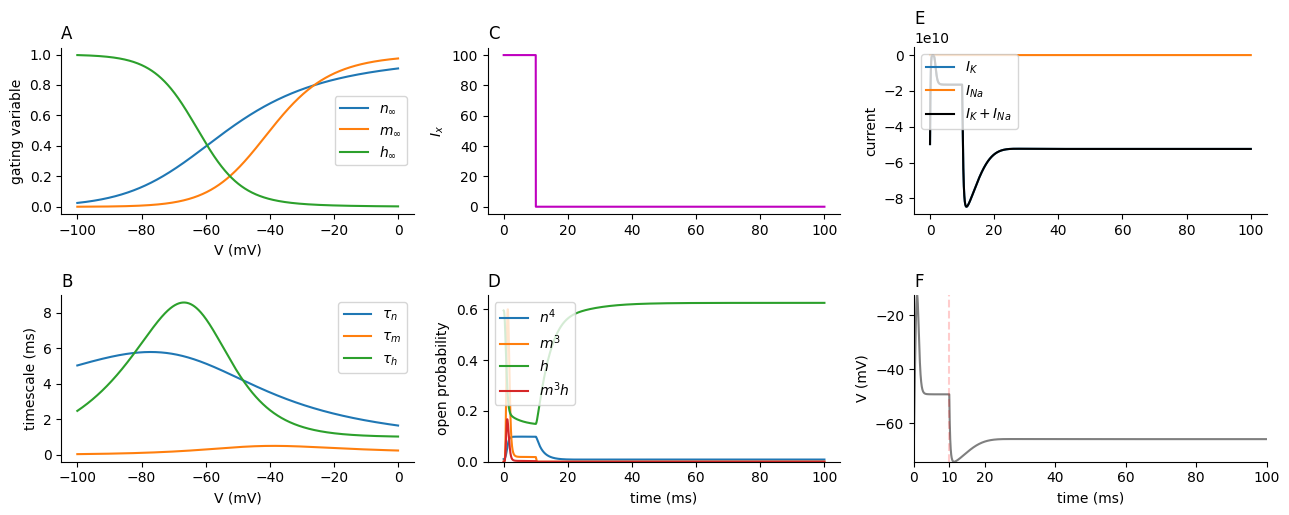

In [47]:
# Make figure
plt.subplots(2,3,figsize=(13,5.25))

# Membrane potential for plotting
Vplot=np.arange(-100,0,.1)

plt.subplot(2,3,1)
plt.plot(Vplot,hh2.n_infty(Vplot),label=r'$n_\infty$')
plt.plot(Vplot,hh2.m_infty(Vplot),label=r'$m_\infty$')
plt.plot(Vplot,hh2.h_infty(Vplot),label=r'$h_\infty$')
plt.legend()
plt.xlabel('V (mV)')
plt.ylabel('gating variable')
plt.title('A',loc='left')
sns.despine()


plt.subplot(2,3,4)
plt.plot(Vplot,hh2.tau_n(Vplot),label=r'$\tau_n$')
plt.plot(Vplot,hh2.tau_m(Vplot),label=r'$\tau_m$')
plt.plot(Vplot,hh2.tau_h(Vplot),label=r'$\tau_h$')
plt.legend()
plt.xlabel('V (mV)')
plt.ylabel('timescale (ms)')
plt.title('B',loc='left')
sns.despine()



plt.subplot(2,3,2)
plt.plot(t2,hh2.Ix,'m')
plt.ylabel(r'$I_{x}$')
plt.title('C',loc='left')
sns.despine()


plt.subplot(2,3,5)
plt.plot(t2,n**4,label=r'$n^4$')
plt.plot(t2,m**3,label=r'$m^3$')
plt.plot(t2,h,label=r'$h$')
plt.plot(t2,(m**3)*h,label=r'$m^3h$')
plt.legend(loc='upper left')
plt.ylabel('open probability')
plt.xlabel('time (ms)')
plt.ylim(bottom=0)
plt.title('D',loc='left')
sns.despine()

plt.subplot(2,3,3)
plt.plot(t2,hh2.IK(n,V),label=r'$I_K$')
plt.plot(t2,hh2.INa(m,h,V),label=r'$I_{Na}$')
plt.plot(t2,hh2.IK(n,V)+hh2.INa(m,h,V),'k',label=r'$I_K+I_{Na}$')
plt.legend(loc='upper left')
plt.ylabel('current')
plt.title('E',loc='left')
sns.despine()


plt.subplot(2,3,6)
plt.plot(t2,V,color=sns.color_palette()[7])
plt.ylabel('V (mV)')
plt.xlabel('time (ms)')
plt.axvline(x=10, color='red', linestyle='--', label="Injected Current Ends", alpha=0.2)
current_ticks = plt.xticks()[0]
plt.xticks(list(current_ticks) + [10])
plt.axis([0,tn,np.min((-70,np.min(V))),np.max((-57,np.max(V)))])
plt.title('F',loc='left')
sns.despine()

plt.tight_layout()

Why does the voltage overshoot at the stimulus onset and undershoot at its offset? Explain based on the behaviors of the activation variable.

**Answer**:
The HH model only models the outward flow of potassium ions through the potassium channel. The outward flow of potassium relates to $n$, the activation variable, and increases as the membrane depolarizes. When we have injected current, depolarization occurs. $n$ responds by increasing and as it increases, the values of the current going through the potassium channel drastically increases since it's proportional to $n^4$. Thus, it overshoots at the stimulus onset. Similarly, when it turns off, $n$ decreases but when the injected current is suddenly shut off, values of $n^4$ are still quite large and thus, it undershoots.
